In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

Make prediction using mobilenetv2

In [3]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
                                  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE+(3,))
])

In [4]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)

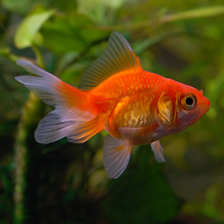

In [5]:
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [7]:
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis,...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [9]:
gold_fish.shape

(224, 224, 3)

In [10]:
result = classifier.predict(gold_fish[np.newaxis,...])

In [11]:
result.shape

(1, 1001)

In [12]:
predict_label_index = np.argmax(result)

In [13]:
predict_label_index

2

In [14]:
image_labels=[]
with open(tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'),'r') as f:
  image_labels = f.read().splitlines()

image_labels[:1000]


['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [15]:
image_labels[predict_label_index]

'goldfish'

In [16]:
image = Image.open('cat1.jpeg').resize(IMAGE_SHAPE)

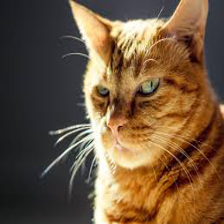

In [17]:
image

In [18]:
image = np.array(image)/255.0

In [19]:
image

array([[[0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        ...,
        [0.2       , 0.21960784, 0.25098039],
        [0.20392157, 0.21176471, 0.25882353],
        [0.20392157, 0.21176471, 0.25882353]],

       [[0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        ...,
        [0.2       , 0.21960784, 0.25098039],
        [0.20392157, 0.21176471, 0.25882353],
        [0.20392157, 0.21176471, 0.25882353]],

       [[0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        [0.09803922, 0.10196078, 0.12156863],
        ...,
        [0.20392157, 0.21568627, 0.25098039],
        [0.20392157, 0.21176471, 0.25882353],
        [0.20392157, 0.21176471, 0.25882353]],

       ...,

       [[0.11764706, 0.1254902 , 0.1254902 ],
        [0.11764706, 0.1254902 , 0.1254902 ],
        [0.11764706, 0

In [20]:
image[np.newaxis,...]

array([[[[0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         ...,
         [0.2       , 0.21960784, 0.25098039],
         [0.20392157, 0.21176471, 0.25882353],
         [0.20392157, 0.21176471, 0.25882353]],

        [[0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         ...,
         [0.2       , 0.21960784, 0.25098039],
         [0.20392157, 0.21176471, 0.25882353],
         [0.20392157, 0.21176471, 0.25882353]],

        [[0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         [0.09803922, 0.10196078, 0.12156863],
         ...,
         [0.20392157, 0.21568627, 0.25098039],
         [0.20392157, 0.21176471, 0.25882353],
         [0.20392157, 0.21176471, 0.25882353]],

        ...,

        [[0.11764706, 0.1254902 , 0.1254902 ],
         [0.11764706, 0.1254902 , 0.1254902 ]

In [21]:
result1 = classifier.predict(image[np.newaxis,...])

In [22]:
image_labels[np.argmax(result1)]

'Egyptian cat'

In [23]:
np.argmax(result1.shape)

1

In [24]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [25]:
data_dir

'./datasets/flower_photos'

In [26]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [27]:
data_dir

PosixPath('datasets/flower_photos')

In [28]:
list(data_dir.glob('*/*.jpg'))[15:25]

[PosixPath('datasets/flower_photos/dandelion/1667963621_c76d570af3_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2387025546_6aecb1b984_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/11595255065_d9550012fc.jpg'),
 PosixPath('datasets/flower_photos/dandelion/13946048982_4e6ec56987.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7164500544_332b75aa3b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4489359360_09db62f825.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9262004825_710346cde9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2497301920_91490c42c0.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2670304799_a3f2eef516_m.jpg')]

In [29]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [30]:
image_count

3670

In [31]:
roses = list(data_dir.glob('roses/*'))

In [32]:
roses[:5]

[PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7419966772_d6c1c22a81.jpg'),
 PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/roses/4504220673_af754fcb40_n.jpg')]

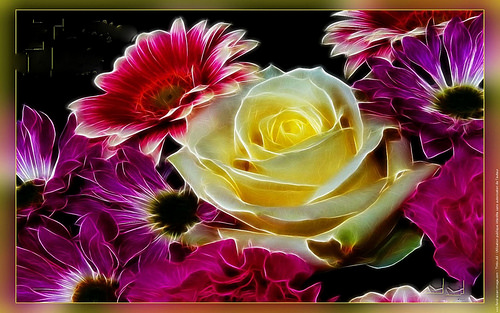

In [33]:
Image.open(str(roses[5]))

In [34]:
tulip = list(data_dir.glob('tulips/*'))

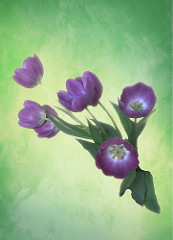

In [35]:
Image.open(str(tulip[0]))

Lets take mobilenet v2 model and retrain it using image dataset

In [36]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [37]:
pretrain_model_without_toplayer = hub.KerasLayer(feature_extractor_model, input_shape = (224,224,3), trainable = False)

In [38]:
num_of_flowers = 5
model = tf.keras.models.Sequential([
                                    pretrain_model_without_toplayer,
                                    tf.keras.layers.Dense(num_of_flowers, activation = 'softmax')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [41]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [42]:
flower_label_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [43]:
flowers_images_dict['roses'][:3]

[PosixPath('datasets/flower_photos/roses/2756028421_b3d5eea526_n.jpg'),
 PosixPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7419966772_d6c1c22a81.jpg')]

In [44]:
name = str(flowers_images_dict['roses'][0])

In [45]:
import cv2

In [46]:
img = cv2.imread(name)

In [47]:
img.shape

(279, 320, 3)

In [48]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)

In [49]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resize_img = cv2.resize(img, (224,224))
    X.append(resize_img)
    y.append(flower_label_dict[flower_name])

In [50]:
len(X)

3670

In [51]:
len(y)

3670

In [52]:
X = np.array(X)
y = np.array(y)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [54]:
X_train = X_train/255
X_test = X_test/255


In [55]:
X[0].shape

(224, 224, 3)

(-0.5, 223.5, 223.5, -0.5)

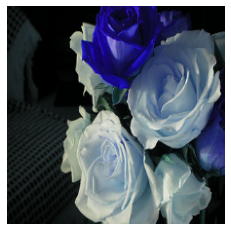

In [56]:
plt.imshow(X[1])
plt.axis('off')

In [57]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 8s 45ms/step - loss: 0.8196 - accuracy: 0.6979
Epoch 2/100
92/92 [==============================] - 4s 42ms/step - loss: 0.4200 - accuracy: 0.8566
Epoch 3/100
92/92 [==============================] - 4s 42ms/step - loss: 0.3273 - accuracy: 0.8903
Epoch 4/100
92/92 [==============================] - 4s 42ms/step - loss: 0.2823 - accuracy: 0.9118
Epoch 5/100
92/92 [==============================] - 4s 42ms/step - loss: 0.2405 - accuracy: 0.9257
Epoch 6/100
92/92 [==============================] - 4s 42ms/step - loss: 0.2151 - accuracy: 0.9326
Epoch 7/100
92/92 [==============================] - 4s 43ms/step - loss: 0.1876 - accuracy: 0.9523
Epoch 8/100
92/92 [==============================] - 4s 42ms/step - loss: 0.1720 - accuracy: 0.9530
Epoch 9/100
92/92 [==============================] - 4s 42ms/step - loss: 0.1553 - accuracy: 0.9605
Epoch 10/100
92/92 [==============================] - 4s 42ms/step - loss: 0.1398 - accuracy: 0.9676
Epoch 11/10

In [58]:
model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 2s 60ms/step - loss: 0.4836 - accuracy: 0.8869


[0.4836100935935974, 0.8869209885597229]